# Breast Cancer Survival Analysis and Prediction

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\NITHI\Downloads\haberman.csv",names=['Age','Op_Year','axil_nodes','Surv_status'])
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

Text(0.5, 1.0, 'AGE OF THE PATIENTS')

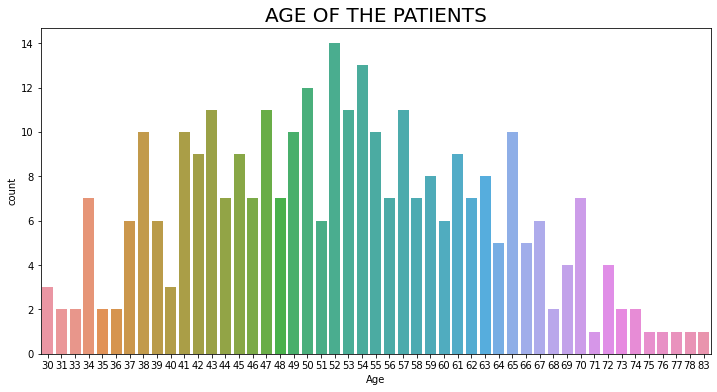

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=df)
plt.title("AGE OF THE PATIENTS",size=20)

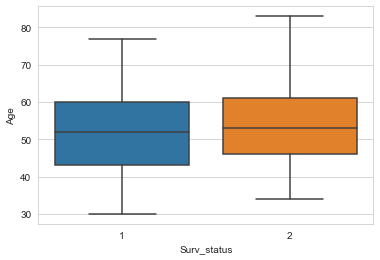

In [40]:
sns.boxplot(x='Surv_status',y='Age', data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


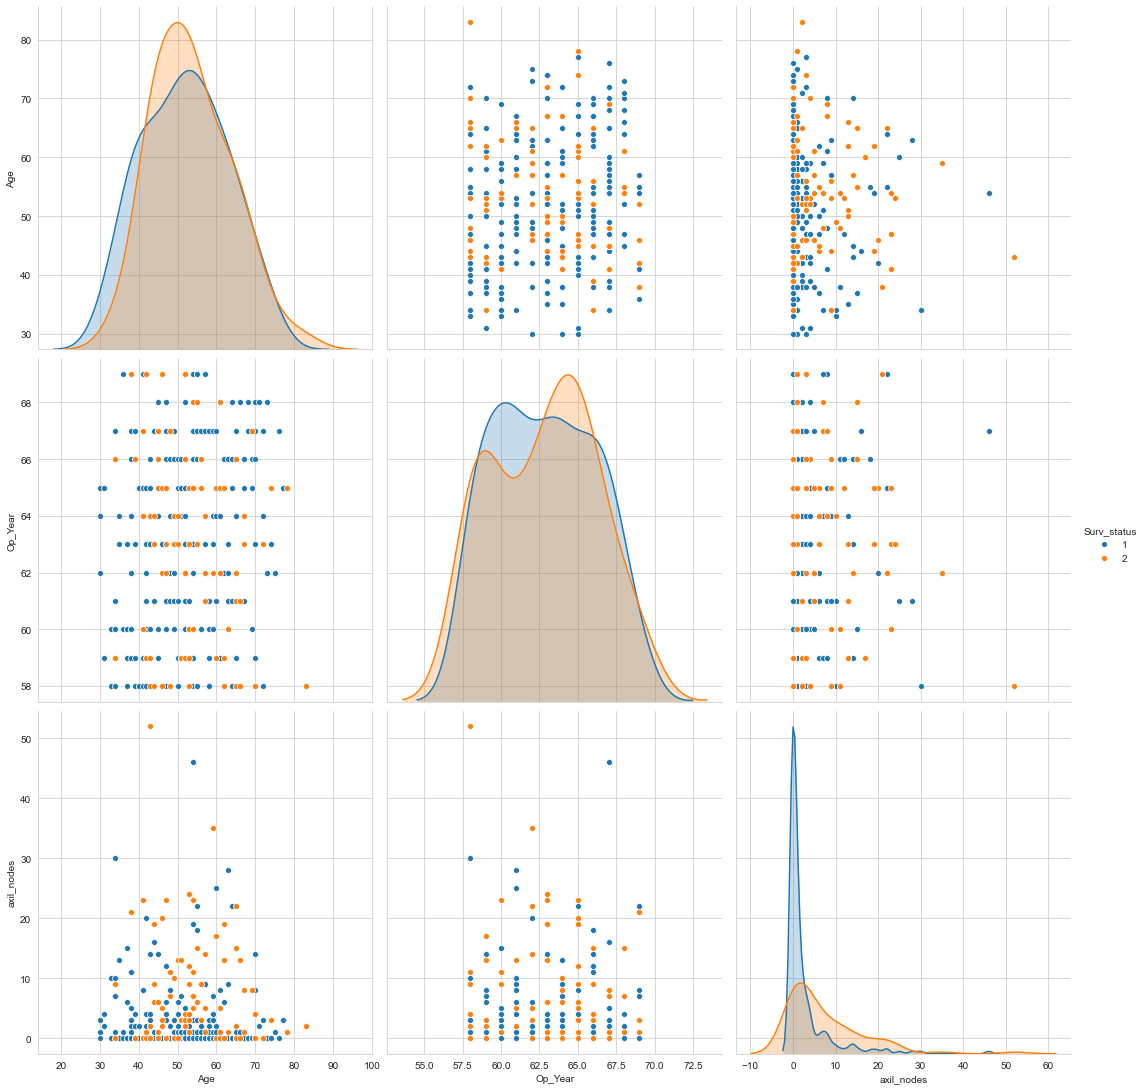

In [15]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='Surv_status',size=5)
plt.show()
# if axil_nodes>= 9 : patient is safe else : patient is unsafe

### Bivariate Analysis

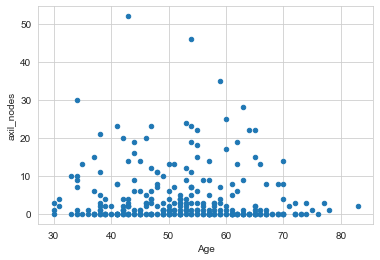

In [18]:
df.plot(kind = "scatter" , x = 'Age' , y = 'axil_nodes')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


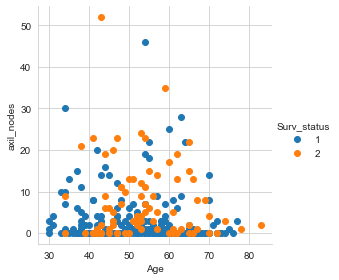

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.show();

###  Univariant Analysis

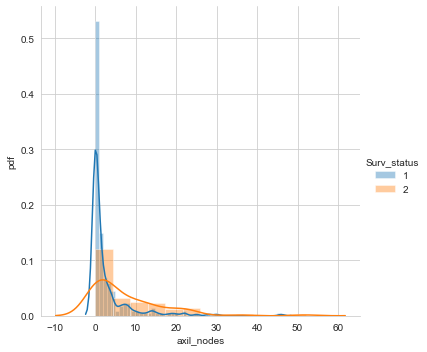

In [43]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.ylabel('pdf')
plt.show();
#  Spread is more for status 1 than status 2. More number of patients of status 1 has less number of Axillary Nodes that may indicate an inverse relation between Axillary nodes and Survival Status.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


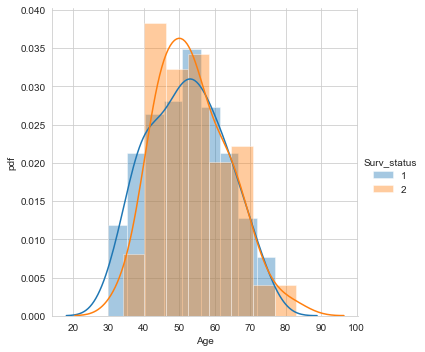

In [44]:
sns.FacetGrid(df, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64

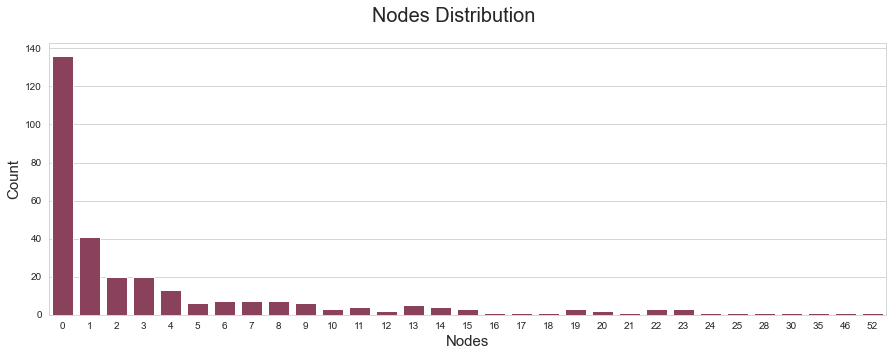

In [35]:
#Axil_Nodes Distribution
display(df['axil_nodes'].describe())

plt.figure(figsize=(15,5))
plt.suptitle('Nodes Distribution', fontsize=20)
_ = sns.countplot(data=df, x='axil_nodes', color='#963559')
_ = plt.ylabel('Count', fontsize=15)
_ = plt.xlabel('Nodes', fontsize=15)


### Distribution of nodes Based on Cancer


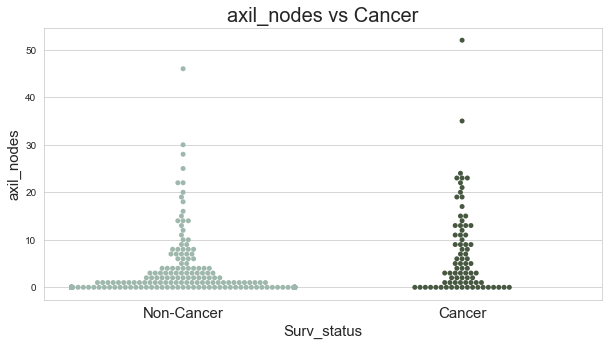

In [39]:
plt.figure(figsize=(10,5))
_ = sns.swarmplot(data=df, x='Surv_status', y='axil_nodes', palette=['#9fb8ad','#475841'])
_ = plt.ylabel('axil_nodes', fontsize=15)
_ = plt.xlabel('Surv_status', fontsize=15)
_ = plt.xticks([0,1],['Non-Cancer','Cancer'], fontsize=15)
_ = plt.title('axil_nodes vs Cancer', fontsize=20)

### Kaplan Meier Estimator

In [45]:
from lifelines import KaplanMeierFitter

In [47]:
kmi = KaplanMeierFitter() 

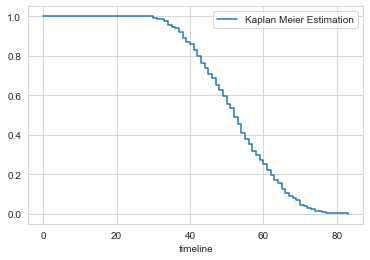

In [48]:
kapmei.fit(df['Age'],df['Surv_status'], label='Kaplan Meier Estimation').plot(ci_show=False)

In [49]:
# with grouping 
group1 = (df['axil_nodes'] >= 1) 
group2 = (df['axil_nodes'] < 1) 
Age = df.Age
Status = df.Surv_status

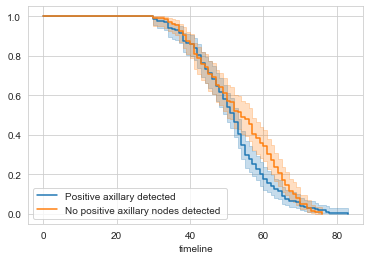

In [50]:
kapmei.fit(Age[group1],Status[group1], label='Positive axillary detected')
kapmei1 = kapmei.plot()
kapmei.fit(Age[group2],Status[group2], label='No positive axillary nodes detected ')
kapmei.plot(ax = kapmei1)

### Cox proportional hazards regression mode

In [51]:
from lifelines import CoxPHFitter

In [52]:
cox = CoxPHFitter()

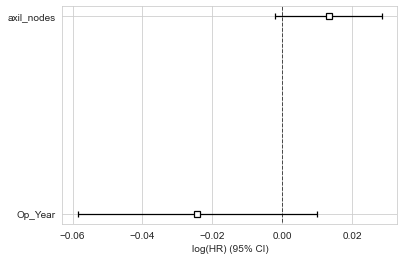

In [53]:
cox.fit(df, 'Age', event_col='Surv_status').plot()

In [54]:
cox.print_summary() 

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv_status'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2021-02-06 12:05:09 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
Op_Year     -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
axil_nodes   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

               z    p   -log2(p)
covariate                       
Op_Year    -1.39 0.16       2.61
axil_nodes  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25